### Import Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Read the Training data

In [2]:
df_train = pd.read_csv('Train_pjb2QcD.txt')

In [3]:
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


### Identify the columns

In [4]:
df_train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

### Read the test data

In [5]:
df_test = pd.read_csv('Test_wyCirpO.txt')

In [6]:
df_train.shape

(9527, 23)

### Check for NULL values in training and test dataset

In [7]:
df_test.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [8]:
df_train.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

### Variable exploration

In [9]:
df_train.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

#### From the above data we can seperate the continous variables from categorical variables
#categorical                      | continous
#Office_PIN                       | Application_Receipt_Date
#Applicant_City_PIN               | Applicant_BirthDate
#Applicant_Gender                 | Manager_DOJ
#Applicant_Marital_Status         | Manager_DoB
#Applicant_Occupation             | Manager_Num_Application
#Applicant_Qualification          | Manager_Num_Coded 
#Manager_Joining_Designation      | Manager_Business 
#Manager_Current_Designation      | Manager_Num_Products
#Manager_Gender                   | Manager_Business2
#Business_Sourced                 | Manager_Num_Products2

### Univariate Analysis for continous variables

In [10]:
df_train['Application_Receipt_Date'].describe()

count         9527
unique         357
top       5/9/2007
freq           165
Name: Application_Receipt_Date, dtype: object

In [11]:
# Convert Application_Receipt_Date to Date time
df_train['Application_Receipt_Date'] = df_train['Application_Receipt_Date'].astype('datetime64')

In [12]:
## Describe again
df_train['Application_Receipt_Date'].describe()

count                    9527
unique                    357
top       2007-05-09 00:00:00
freq                      165
first     2007-04-16 00:00:00
last      2008-07-01 00:00:00
Name: Application_Receipt_Date, dtype: object

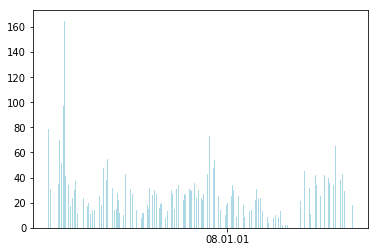

In [13]:
#Check appications on a date
fig, ax = plt.subplots(1,1)
ax.hist(df_train['Application_Receipt_Date'], bins=1000, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y.%m.%d'))
plt.show()

In [14]:
## Univatiate analysis of Applicant_BirthDate
# Convert Application_Receipt_Date to Date time
df_train['Applicant_BirthDate'] = df_train['Applicant_BirthDate'].astype('datetime64')

#Describe df_train['Applicant_BirthDate']
df_train['Applicant_BirthDate'].describe()

count                    9454
unique                   5836
top       1978-01-03 00:00:00
freq                       24
first     1930-02-28 00:00:00
last      1992-12-03 00:00:00
Name: Applicant_BirthDate, dtype: object

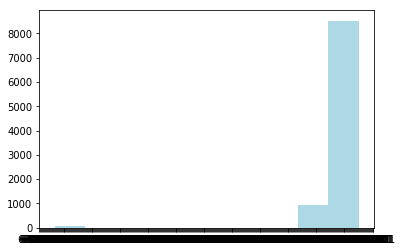

In [15]:
## Age of candidate
#Check appications on a date
fig, ax = plt.subplots(1,1)
ax.hist(df_train['Applicant_BirthDate'], bins=10, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y.%m.%d'))
plt.show()

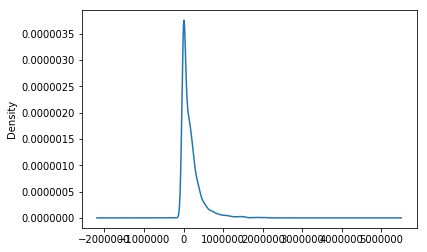

In [16]:
# Plot Histogram
df_train['Manager_Business'].plot.kde()

In [17]:
# Univatiate analysis for Manager_Num_Products
df_train['Manager_Num_Products'].describe()

count    8844.000000
mean        7.152307
std         8.439351
min         0.000000
25%         0.000000
50%         5.000000
75%        11.000000
max       101.000000
Name: Manager_Num_Products, dtype: float64

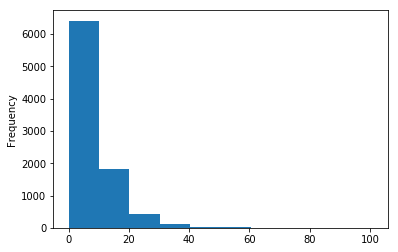

In [18]:
df_train['Manager_Num_Products'].plot.hist()

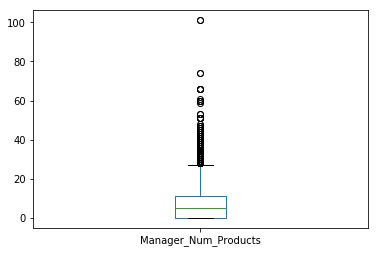

In [19]:
df_train['Manager_Num_Products'].plot.box()

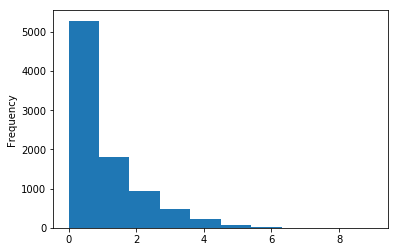

In [20]:
## Univariate analysis of Manager_Num_Coded
df_train['Manager_Num_Coded'].plot.hist()

#### Check the following Features and variations
Manager_Num_Application    --- > Total no of application sourced by Manager in the last 3 months

Manager_Num_Coded          --- > No of agents recurited by Managers in the last 3 months.

Manager_Business           --- > Amount of business sourced in last 3 months.

Manager_Num_Products       --- > Business sourced excluding from Category A advisor.

Manager_Business2          --- > Business sourced excluding from Category A advisor.

Manager_Num_Products2      --- > Products Sold  excluding from Category A advisor.

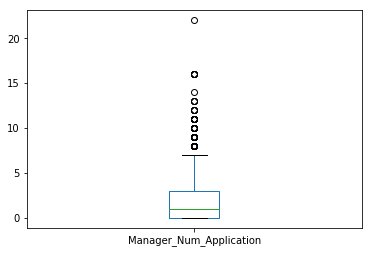

In [21]:
df_train['Manager_Num_Application'].plot.box()

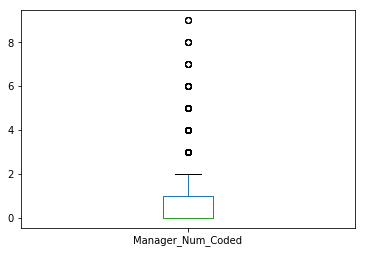

In [22]:
df_train['Manager_Num_Coded'].plot.box()

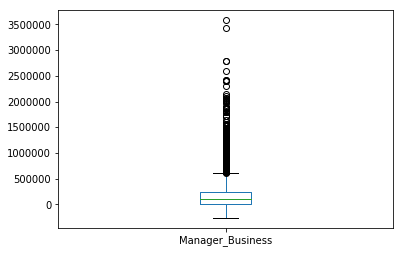

In [23]:
df_train['Manager_Business'].plot.box()

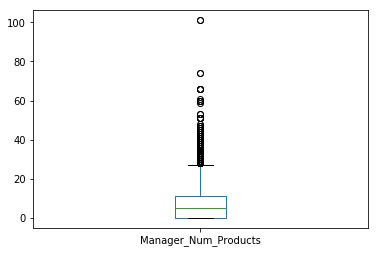

In [24]:
df_train['Manager_Num_Products'].plot.box()

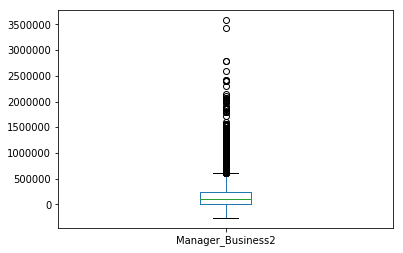

In [25]:
df_train['Manager_Business2'].plot.box()

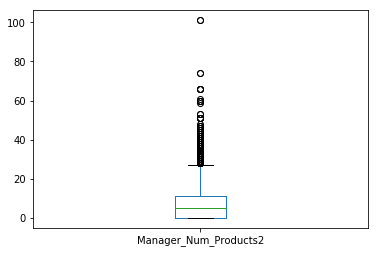

In [26]:
df_train['Manager_Num_Products2'].plot.box()

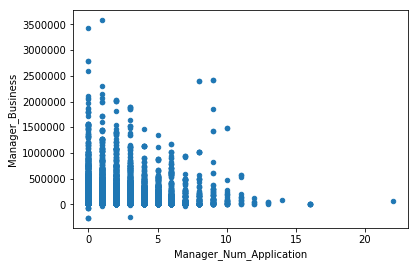

In [27]:
## How does the Manager_Num_Application --- > Total no of application sourced by Manager in the last 3 months
##And
## Manager_Num_Coded No of agents recurited by Managers in the last 3 months.
## Relate??

# For continous continous variable comparision use scatter plot
df_train.plot.scatter('Manager_Num_Application','Manager_Business')

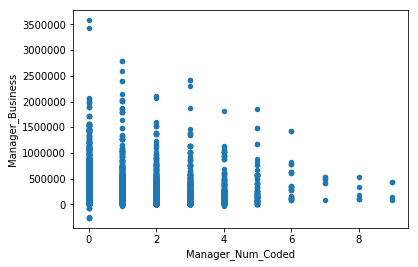

In [28]:
df_train.plot.scatter('Manager_Num_Coded','Manager_Business')

In [29]:
# Find the correlation
df_train['Manager_Num_Coded'].corr(df_train['Manager_Business'])

0.1528584973354259

In [30]:
df_train.corr()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
Office_PIN,1.000000,0.977756,-0.077063,0.061672,0.066030,0.093603,0.132186,0.093386,0.131747,0.027682
Applicant_City_PIN,0.977756,1.000000,-0.091697,0.055152,0.060603,0.089794,0.131358,0.089425,0.130928,0.028036
Manager_Grade,-0.077063,-0.091697,1.000000,-0.022524,-0.002833,0.322211,0.210353,0.320644,0.209886,0.059363
Manager_Num_Application,0.061672,0.055152,-0.022524,1.000000,0.514299,0.014605,-0.030293,0.015871,-0.029977,-0.037593
Manager_Num_Coded,0.066030,0.060603,-0.002833,0.514299,1.000000,0.152858,0.129490,0.155289,0.130039,0.013565
Manager_Business,0.093603,0.089794,0.322211,0.014605,0.152858,1.000000,0.733880,0.994422,0.729147,0.031578
Manager_Num_Products,0.132186,0.131358,0.210353,-0.030293,0.129490,0.733880,1.000000,0.736272,0.998893,-0.011000
Manager_Business2,0.093386,0.089425,0.320644,0.015871,0.155289,0.994422,0.736272,1.000000,0.735594,0.031093
Manager_Num_Products2,0.131747,0.130928,0.209886,-0.029977,0.130039,0.729147,0.998893,0.735594,1.000000,-0.011706
Business_Sourced,0.027682,0.028036,0.059363,-0.037593,0.013565,0.031578,-0.011000,0.031093,-0.011706,1.000000


In [31]:
df_train['Manager_Num_Application'].corr(df_train['Manager_Business'])

0.014605124867264263

### Categorical Continous variable Bivaiate analysis

In [32]:
df_train.groupby('Applicant_Gender')['Manager_Business'].mean()

Applicant_Gender
F    203604.33630
M    178409.62515
Name: Manager_Business, dtype: float64

In [33]:
df_train.groupby('Applicant_Gender')['Business_Sourced'].mean()

Applicant_Gender
F    0.385357
M    0.332637
Name: Business_Sourced, dtype: float64

In [34]:
### importing scipy library for ttest
from scipy.stats import ttest_ind

In [35]:
yes = df_train[df_train['Business_Sourced']== 1]

In [36]:
no = df_train[df_train['Business_Sourced']== 0]

In [37]:
yes.shape

(3267, 23)

In [38]:
no.shape

(6260, 23)

In [39]:
ttest_ind(yes['Manager_Num_Application'],no['Manager_Num_Application'],nan_policy ='omit')

Ttest_indResult(statistic=-3.537466131752335, pvalue=0.00040605709324280956)

In [40]:
ttest_ind(yes['Manager_Business'],no['Manager_Business'],nan_policy ='omit')

Ttest_indResult(statistic=2.9707927764178277, pvalue=0.002978308801407785)

In [41]:
ttest_ind(yes['Manager_Grade'],no['Manager_Grade'],nan_policy ='omit')

Ttest_indResult(statistic=5.591867797198048, pvalue=2.3132440173630537e-08)

In [42]:
ttest_ind(yes['Manager_Num_Coded'],no['Manager_Num_Coded'],nan_policy ='omit')

Ttest_indResult(statistic=1.2756304092859416, pvalue=0.20211971049956026)

#### Bivariate analysis of Categorical and Categorical Variables

In [43]:
# create a two way table
pd.crosstab(df_train['Manager_Status'],df_train['Business_Sourced'])

Business_Sourced,0,1
Manager_Status,,
Confirmation,3562,1715
Probation,2251,1316


In [44]:
pd.crosstab(df_train['Manager_Gender'],df_train['Business_Sourced'])

Business_Sourced,0,1
Manager_Gender,,
F,750,467
M,5063,2564


In [45]:
pd.crosstab(df_train['Manager_Current_Designation'],df_train['Business_Sourced'])

Business_Sourced,0,1
Manager_Current_Designation,,
Level 1,1702,777
Level 2,2114,1094
Level 3,1335,698
Level 4,604,427
Level 5,58,35


In [46]:
from scipy.stats import chi2_contingency

In [47]:
chi2_contingency(pd.crosstab(df_train['Manager_Current_Designation'],df_train['Business_Sourced']))

(33.31014968841196,
 1.031959046237612e-06,
 4,
 array([[1629.40151515,  849.59848485],
        [2108.55992763, 1099.44007237],
        [1336.25384441,  696.74615559],
        [ 677.65750791,  353.34249209],
        [  61.12720488,   31.87279512]]))

#### Treating missing values

In [48]:
df_train.shape

(9527, 23)

In [49]:
df_train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [50]:
df_train.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [51]:
df_train.dropna(how='all').shape

(9527, 23)